In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import norm
from SBR import sosf,acf,ps,sosfnorm,sosfw,sosfw2,sosfwx

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

In [2]:
#Input
#Constant
c=299792.459#km/s
#Iraf
corrhelio=25.68#km/s
#Theory Lambda
lr=[6562.8,6548,6583,6717,6731]#AngstromsR
lb=[4861.36,4958.9,5006.9]#AngstromsB
#LimitData
min0=75
max0=130

In [3]:
inputf='595.Isis.WHT.Red.txt'

data0=pd.read_table(inputf)
data1=data0.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})

mr=(data1.X<max0)&(data1.X>min0)
data1=data1[mr]

In [4]:
for i in 0,2,4:
    Nx=i
    N=str(Nx)

    data2=data1[['X','Y','Center.'+N,'Peak.'+N,'Width.'+N]]

    RVo=c*(data2["Center."+N]-lr[Nx])/lr[Nx]
    RV=RVo+corrhelio

    data2=data2.assign(RV=RV.values)

    a=[data2.X,data2.Y,data2.RV,data2['Peak.'+N]]
    data3=pd.DataFrame(a).T
    data3.columns=['X','Y','RV','I']
    data3.to_csv('dataII'+str(int(lr[Nx]))+'.csv')

In [5]:
datap='dataII6562.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,369.00000,369.000000,369.000000,369.000000
mean,101.91600,10.555556,-1017.841296,1190.327263
std,15.88847,7.003320,15594.515616,1745.710725
min,75.09600,0.000000,-299766.779000,0.000000
25%,88.50600,5.000000,-213.594837,269.400000
50%,101.91600,11.000000,-204.641445,533.400000
75%,115.32600,15.000000,-196.555984,1159.000000
max,128.73600,22.000000,-177.781268,9957.000000


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


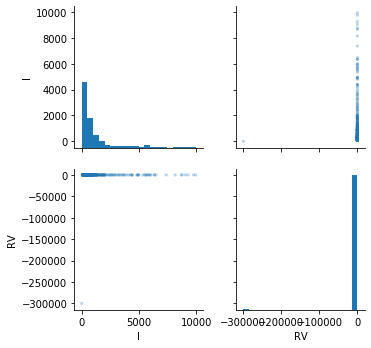

In [6]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [7]:
mf=(dt.I<30000)&(dt.I>10)
dt=dt[mf]
mrv=(dt.RV<-100)&(dt.RV>-300)
dt=dt[mrv]

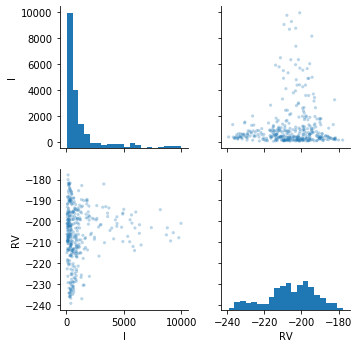

In [8]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

In [9]:
dataH=dt.copy()

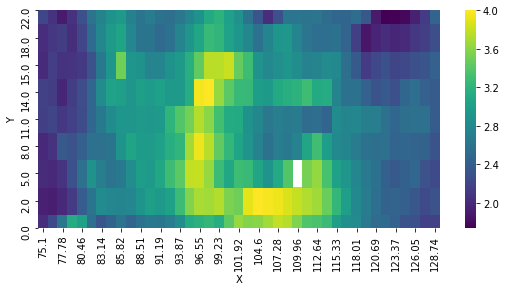

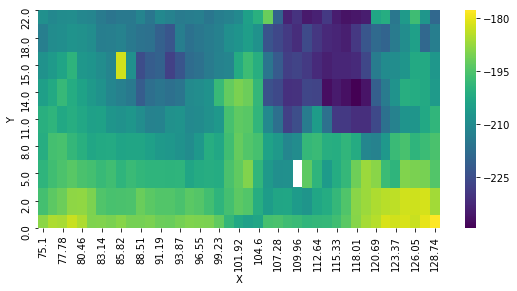

In [10]:
datal=dt.copy()
datal.I=np.log10(datal.I)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(dataH_f, cmap="viridis")
plt.gca().invert_yaxis()

datal=dt.copy()
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(dataH_f, cmap="viridis")
plt.gca().invert_yaxis()



/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:243: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:252: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:183: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:686: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:695: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD

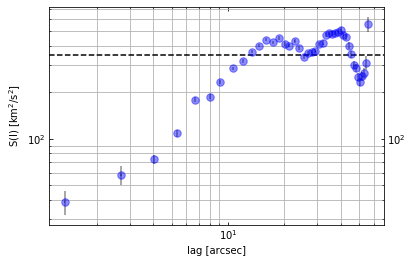

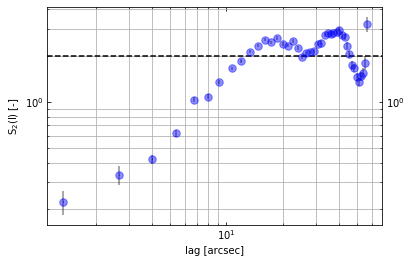

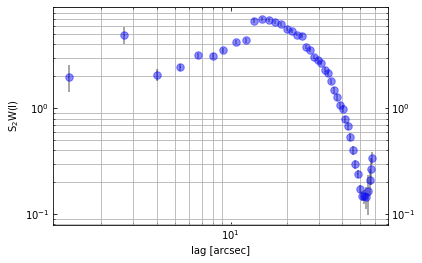

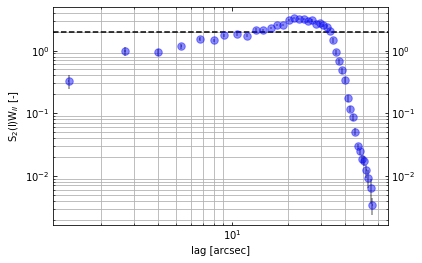

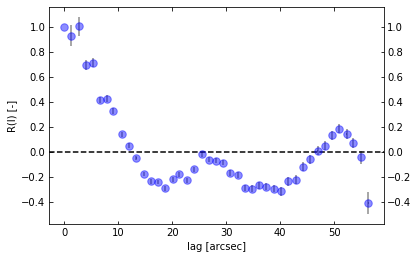

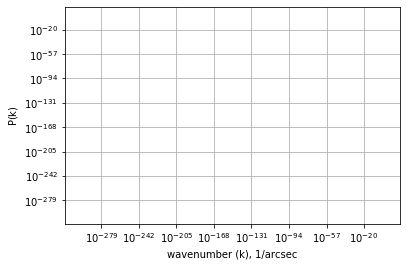

In [11]:
sfH00=sosf(dt)
sfnH00=sosfnorm(dt)
sfwH00=sosfwx(dt)
sfw2H00=sosfw2(dt)
afH00=acf(dt)
psH00=ps(dt)

In [12]:
datap='dataII6583.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,369.00000,369.000000,369.000000,369.000000
mean,101.91600,10.555556,-994.291321,227.986802
std,15.88847,7.003320,15595.745511,403.647821
min,75.09600,0.000000,-299766.779000,0.000000
25%,88.50600,5.000000,-190.910147,41.940000
50%,101.91600,11.000000,-181.574364,82.860000
75%,115.32600,15.000000,-174.105739,224.800000
max,128.73600,22.000000,-90.948967,4581.000000


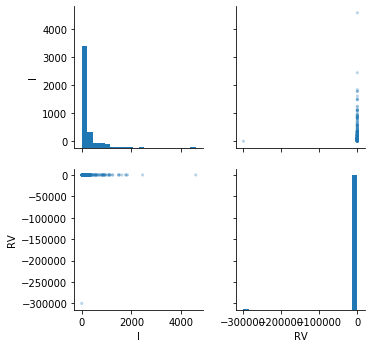

In [13]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [14]:
mf=(dt.I<2500)&(dt.I>10)
dt=dt[mf]
mrv=(dt.RV<-150)&(dt.RV>-250)
dt=dt[mrv]

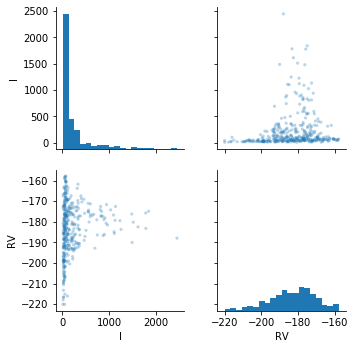

In [15]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [16]:
dataN=dt.copy()

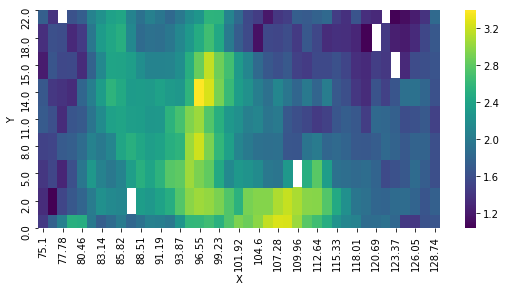

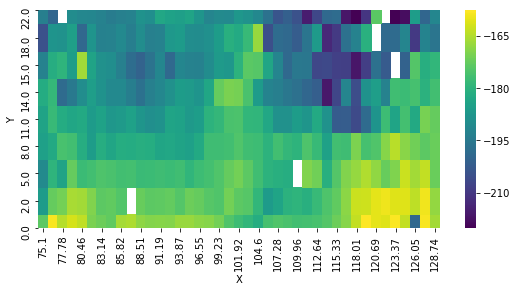

In [17]:
datal=dt.copy()
datal.I=np.log10(datal.I)
dataN_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(dataN_f, cmap="viridis")
plt.gca().invert_yaxis()

datal=dt.copy()
dataN_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(dataN_rv, cmap="viridis")
plt.gca().invert_yaxis()

In [18]:
dt.describe()

,X,Y,RV,I
count,363.000000,363.000000,363.000000,363.000000
mean,101.834727,10.498623,-183.052107,219.002176
std,15.838828,6.974054,12.456971,335.481653
min,75.096000,0.000000,-220.101544,11.010000
25%,88.506000,5.000000,-191.046768,44.005000
50%,101.916000,11.000000,-181.665445,85.850000
75%,115.326000,15.000000,-174.356211,225.350000
max,128.736000,22.000000,-157.756735,2445.000000


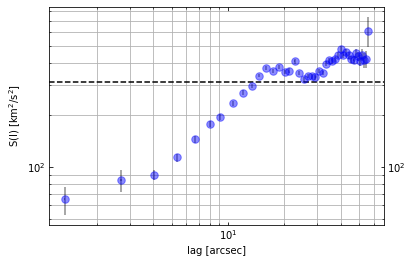

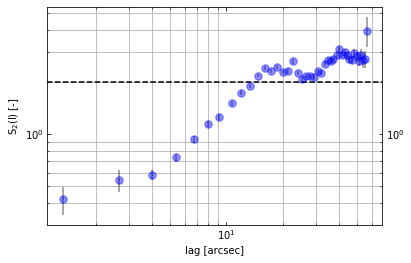

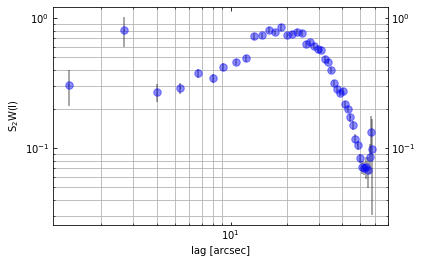

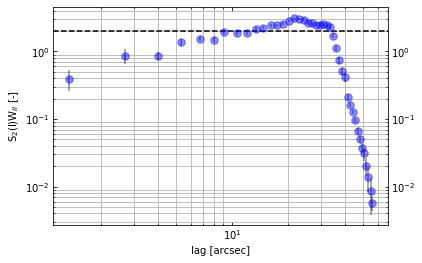

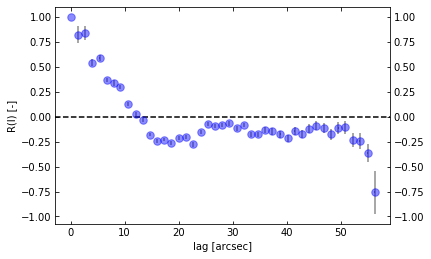

In [19]:
sfN00=sosf(dt)
sfnN00=sosfnorm(dt)
sfwN00=sosfwx(dt)
sfw2N00=sosfw2(dt)
afN00=acf(dt)
#psN00=ps(dt)

In [20]:
datap='dataII6731.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,369.00000,369.000000,369.000000,369.000000
mean,101.91600,10.555556,-995.917405,75.678025
std,15.88847,7.003320,15595.680320,140.973482
min,75.09600,0.000000,-299766.779000,-14.990000
25%,88.50600,5.000000,-191.447951,18.420000
50%,101.91600,11.000000,-184.232622,33.300000
75%,115.32600,15.000000,-177.106371,81.630000
max,128.73600,22.000000,9.779553,1937.000000


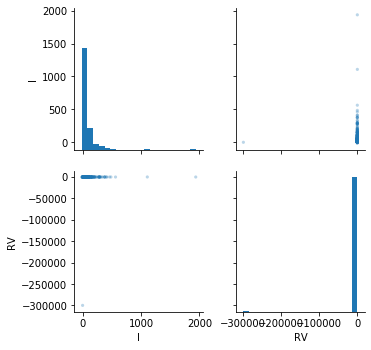

In [21]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [22]:
mf=(dt.I<1000)&(dt.I>10)
dt=dt[mf]
mrv=(dt.RV<-140)&(dt.RV>-240)
dt=dt[mrv]

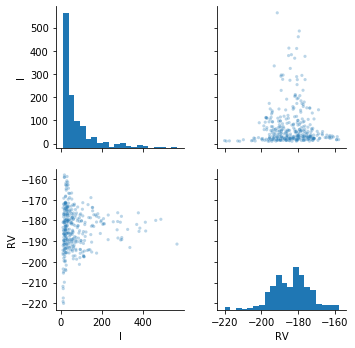

In [23]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

In [24]:
dataS=dt.copy()

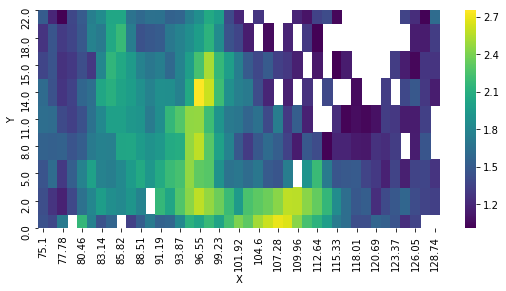

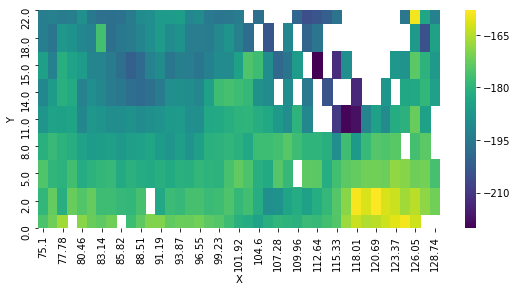

In [25]:
datal=dt.copy()
datal.I=np.log10(datal.I)
dataS_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(dataS_f, cmap="viridis")
plt.gca().invert_yaxis()

datal=dt.copy()
dataS_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(dataS_rv, cmap="viridis")
plt.gca().invert_yaxis()

In [26]:
dt.describe()

,X,Y,RV,I
count,322.000000,322.000000,322.000000,322.000000
mean,100.016944,9.940994,-183.796776,75.676056
std,15.673007,6.875819,10.268001,88.441548
min,75.096000,0.000000,-220.042032,10.170000
25%,87.165000,5.000000,-190.456957,22.780000
50%,99.234000,11.000000,-182.851911,41.460000
75%,112.644000,15.000000,-177.239989,91.980000
max,128.736000,22.000000,-157.999112,563.600000


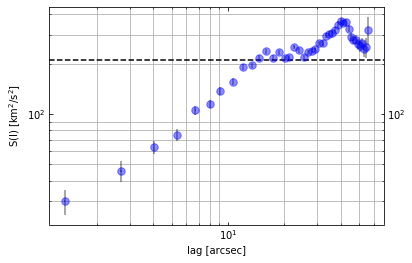

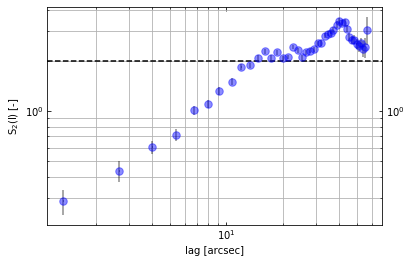

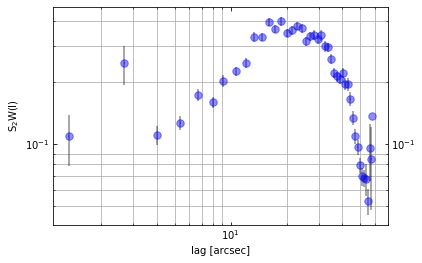

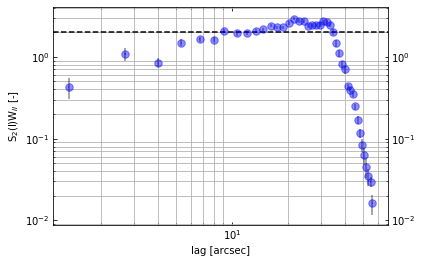

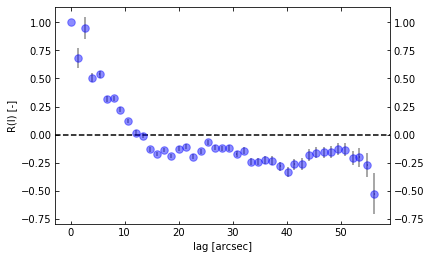

In [27]:
sfS00=sosf(dt)
sfnS00=sosfnorm(dt)
sfwS00=sosfwx(dt)
sfw2S00=sosfw2(dt)
afS00=acf(dt)
#psS00=ps(dt)

In [28]:
#Input
#Constant
c=299792.459#km/s
#Iraf
corrhelio=25.68#km/s
#Theory Lambda
#lr=[6562.8,6548,6583,6717,6731]#AngstromsR
lb=[4861.36,4958.9,5006.9]#AngstromsB
#LimitData
min0=95
max0=135

inputf='595.Isis.WHT.Blue.txt'

data0=pd.read_table(inputf)
data1=data0.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})

mr=(data1.X<max0)&(data1.X>min0)
data1=data1[mr]

In [29]:
for i in 0,2:
    Nx=i
    N=str(Nx)

    data2=data1[['X','Y','Center.'+N,'Peak.'+N,'Width.'+N]]

    RVo=c*(data2["Center."+N]-lb[Nx])/lb[Nx]
    RV=RVo+corrhelio

    data2=data2.assign(RV=RV.values)

    a=[data2.X,data2.Y,data2.RV,data2['Peak.'+N]]
    data3=pd.DataFrame(a).T
    data3.columns=['X','Y','RV','I']
    data3.to_csv('dataII'+str(int(lb[Nx]))+'.csv')

In [30]:
datap='dataII5006.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,252.000000,252.000000,252.000000,252.000000
mean,115.147200,10.555556,-2473.936748,1802.137913
std,11.577403,7.007743,26664.743203,25897.169791
min,95.836800,0.000000,-299766.779000,-35.280000
25%,105.492000,5.000000,-216.996873,13.150000
50%,115.147200,11.000000,-199.662811,23.135000
75%,124.802400,15.000000,-189.588697,46.680000
max,134.457600,22.000000,12008.816112,409800.000000


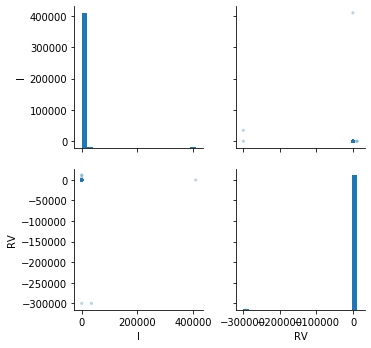

In [31]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [32]:
mf=(dt.I<1000)&(dt.I>10)
dt=dt[mf]
mrv=(dt.RV<-150)&(dt.RV>-250)
dt=dt[mrv]

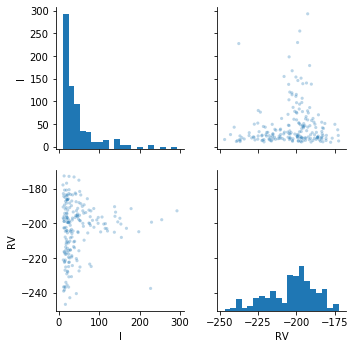

In [33]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

In [34]:
dataO=dt.copy()

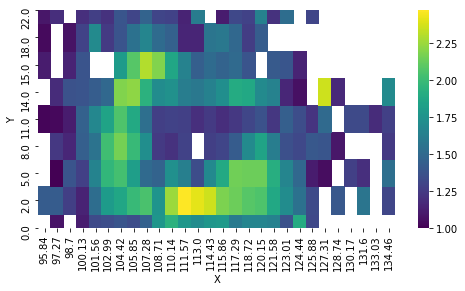

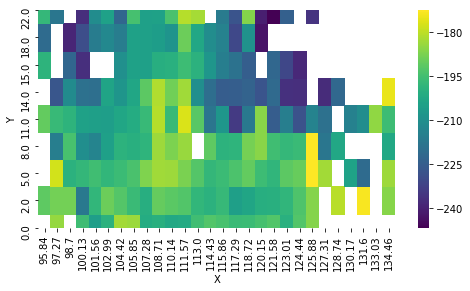

In [35]:
datal=dt.copy()
datal.I=np.log10(datal.I)
dataO_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(dataO_f, cmap="viridis")
plt.gca().invert_yaxis()

datal=dt.copy()
dataO_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(dataO_rv, cmap="viridis")
plt.gca().invert_yaxis()

In [36]:
dt.describe()

,X,Y,RV,I
count,196.000000,196.000000,196.000000,196.000000
mean,112.789959,9.984694,-203.190599,47.284898
std,10.076368,6.778909,15.850316,47.490403
min,95.836800,0.000000,-246.815053,10.060000
25%,104.419200,5.000000,-214.137801,19.055000
50%,112.286400,11.000000,-199.662811,28.170000
75%,120.153600,15.000000,-192.537583,52.455000
max,134.457600,22.000000,-172.509107,293.000000


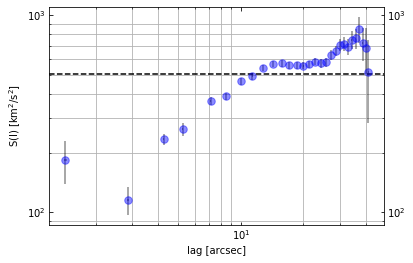

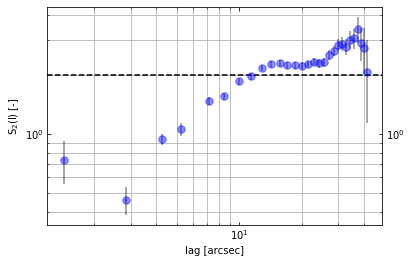

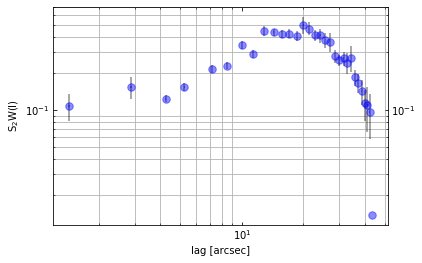

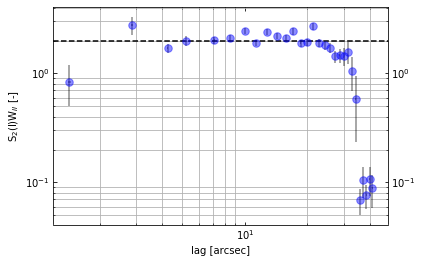

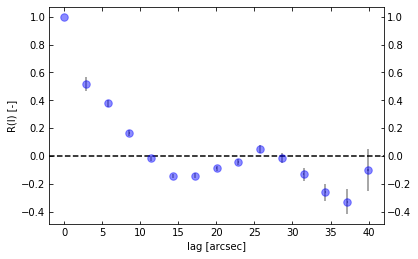

In [37]:
sfO00=sosf(dt)
sfnO00=sosfnorm(dt)
sfwO00=sosfwx(dt)
sfw2O00=sosfw2(dt)
afO00=acf(dt)
#psS00=ps(dt)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


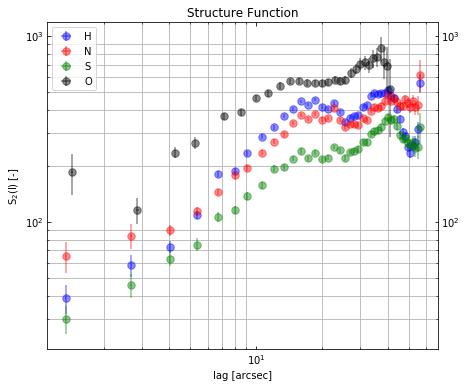

In [38]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfH00['Lag'],sfH00['Nmqvd'],xerr=sfH00.ErrX, yerr=sfH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='H')
ax.errorbar(sfN00['Lag'],sfN00['Nmqvd'],xerr=sfN00.ErrX, yerr=sfN00.ErrY, fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='N')
ax.errorbar(sfS00['Lag'],sfS00['Nmqvd'],xerr=sfS00.ErrX, yerr=sfS00.ErrY, fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='S')
ax.errorbar(sfO00['Lag'],sfO00['Nmqvd'],xerr=sfO00.ErrX, yerr=sfO00.ErrY, fmt="o",color='k', ecolor='k', alpha=0.45, markersize=7.5, label='O')
#ax.errorbar(sfH01c['Lag'],sfH01c['Nmqvd'],xerr=sfH01c.ErrX, yerr=sfH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
#ax.errorbar(sfH02c['Lag'],sfH02c['Nmqvd'],xerr=sfH02c.ErrX, yerr=sfH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Structure Function')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="17"

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


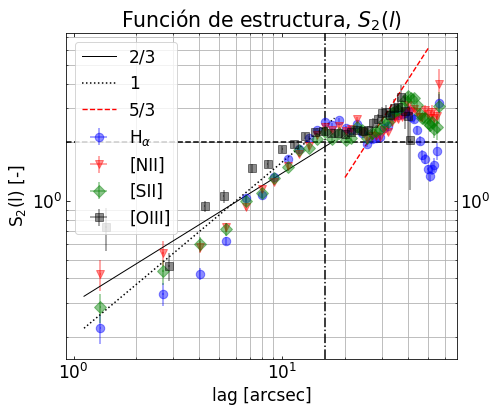

In [39]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfnH00['Lag'],sfnH00['Nmqvd'],xerr=sfnH00.ErrX, yerr=sfnH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=8.5, label=r'H$_{\alpha}$')
ax.errorbar(sfnN00['Lag'],sfnN00['Nmqvd'],xerr=sfnN00.ErrX, yerr=sfnN00.ErrY, fmt="v",color='r', ecolor='r', alpha=0.45, markersize=8.5, label='[NII]')
ax.errorbar(sfnS00['Lag'],sfnS00['Nmqvd'],xerr=sfnS00.ErrX, yerr=sfnS00.ErrY, fmt="D",color='g', ecolor='g', alpha=0.45, markersize=8.5, label='[SII]')
ax.errorbar(sfnO00['Lag'],sfnO00['Nmqvd'],xerr=sfnO00.ErrX, yerr=sfnO00.ErrY, fmt="s",color='k', ecolor='k', alpha=0.45, markersize=8.5, label='[OIII]')
#ax.errorbar(sfH01c['Lag'],sfH01c['Nmqvd'],xerr=sfH01c.ErrX, yerr=sfH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
#ax.errorbar(sfH02c['Lag'],sfH02c['Nmqvd'],xerr=sfH02c.ErrX, yerr=sfH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
sgrid = np.logspace(.05, 1.25)
ax.plot(sgrid, 0.3*sgrid**(2/3), color="black", lw=1, label='2/3')
ax.plot(sgrid, 0.2*sgrid**(0.9), color="black", lw=1.5, label='1',linestyle=':')
sgrid2 = np.logspace(1.3, 1.7)
ax.plot(sgrid2, 0.009*sgrid2**(5/3), color="r", lw=1.4, label='5/3', linestyle='--')
ax.axvline(x=16, color='k', linestyle='-.')


ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="17"

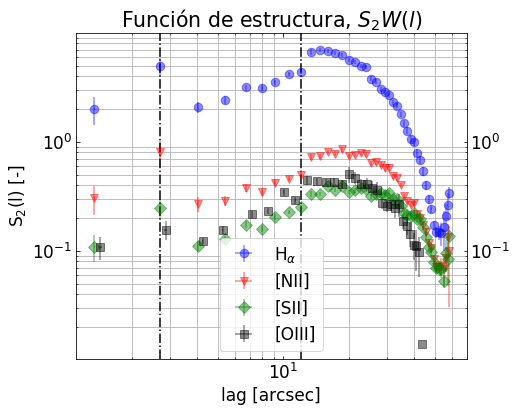

In [40]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfwH00['Lag'],sfwH00['Nmqvd'],xerr=sfwH00.ErrX, yerr=sfwH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=8.5, label=r'H$_{\alpha}$')
ax.errorbar(sfwN00['Lag'],sfwN00['Nmqvd'],xerr=sfwN00.ErrX, yerr=sfwN00.ErrY, fmt="v",color='r', ecolor='r', alpha=0.45, markersize=8.5, label='[NII]')
ax.errorbar(sfwS00['Lag'],sfwS00['Nmqvd'],xerr=sfwS00.ErrX, yerr=sfwS00.ErrY, fmt="D",color='g', ecolor='g', alpha=0.45, markersize=8.5, label='[SII]')
ax.errorbar(sfwO00['Lag'],sfwO00['Nmqvd'],xerr=sfwO00.ErrX, yerr=sfwO00.ErrY, fmt="s",color='k', ecolor='k', alpha=0.45, markersize=8.5, label='[OIII]')
#ax.errorbar(sfH01c['Lag'],sfH01c['Nmqvd'],xerr=sfH01c.ErrX, yerr=sfH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
#ax.errorbar(sfH02c['Lag'],sfH02c['Nmqvd'],xerr=sfH02c.ErrX, yerr=sfH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
ax.axvline(x=2.7, color='k', linestyle='-.')
ax.axvline(x=12, color='k', linestyle='-.')

ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Función de estructura, $S_{2}W(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='best')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="17"

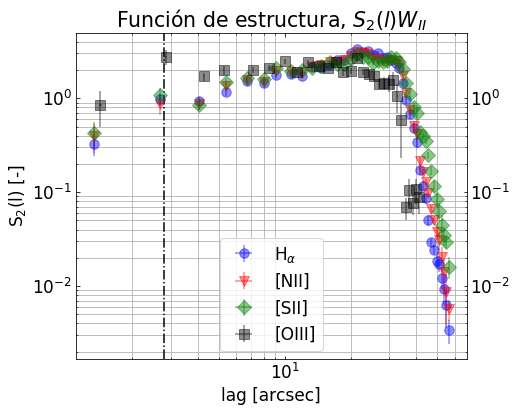

In [41]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfw2H00['Lag'],sfw2H00['Nmqvd'],xerr=sfw2H00.ErrX, yerr=sfw2H00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=9.5, label=r'H$_{\alpha}$')
ax.errorbar(sfw2N00['Lag'],sfw2N00['Nmqvd'],xerr=sfw2N00.ErrX, yerr=sfw2N00.ErrY, fmt="v",color='r', ecolor='r', alpha=0.45, markersize=9.5, label='[NII]')
ax.errorbar(sfw2S00['Lag'],sfw2S00['Nmqvd'],xerr=sfw2S00.ErrX, yerr=sfw2S00.ErrY, fmt="D",color='g', ecolor='g', alpha=0.45, markersize=9.5, label='[SII]')
ax.errorbar(sfw2O00['Lag'],sfw2O00['Nmqvd'],xerr=sfw2O00.ErrX, yerr=sfw2O00.ErrY, fmt="s",color='k', ecolor='k', alpha=0.45, markersize=9.5, label='[OIII]')
#ax.errorbar(sfH01c['Lag'],sfH01c['Nmqvd'],xerr=sfH01c.ErrX, yerr=sfH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
#ax.errorbar(sfH02c['Lag'],sfH02c['Nmqvd'],xerr=sfH02c.ErrX, yerr=sfH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#ax.axvline(x=5, color='k', linestyle='-.')
ax.axvline(x=2.8, color='k', linestyle='-.')

#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Función de estructura, $S_{2}(l)W_{II}$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='best')
plt.grid(which='minor')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="17"

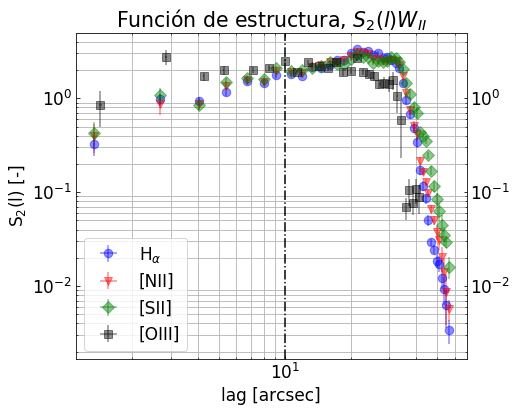

In [42]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfw2H00['Lag'],sfw2H00['Nmqvd'],xerr=sfw2H00.ErrX, yerr=sfw2H00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=8.5, label=r'H$_{\alpha}$')
ax.errorbar(sfw2N00['Lag'],sfw2N00['Nmqvd'],xerr=sfw2N00.ErrX, yerr=sfw2N00.ErrY, fmt="v",color='r', ecolor='r', alpha=0.45, markersize=8.5, label='[NII]')
ax.errorbar(sfw2S00['Lag'],sfw2S00['Nmqvd'],xerr=sfw2S00.ErrX, yerr=sfw2S00.ErrY, fmt="D",color='g', ecolor='g', alpha=0.45, markersize=8.5, label='[SII]')
ax.errorbar(sfw2O00['Lag'],sfw2O00['Nmqvd'],xerr=sfw2O00.ErrX, yerr=sfw2O00.ErrY, fmt="s",color='k', ecolor='k', alpha=0.45, markersize=8.5, label='[OIII]')
#ax.errorbar(sfH01c['Lag'],sfH01c['Nmqvd'],xerr=sfH01c.ErrX, yerr=sfH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
#ax.errorbar(sfH02c['Lag'],sfH02c['Nmqvd'],xerr=sfH02c.ErrX, yerr=sfH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
ax.axvline(x=10, color='k', linestyle='-.')

#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Función de estructura, $S_{2}(l)W_{II}$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='lower left')
plt.grid(which='minor')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="17"

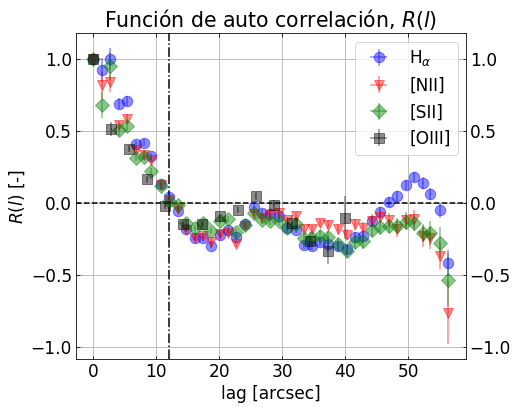

In [43]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(afH00['Lag'],afH00['Nmqvd'],xerr=afH00.ErrX, yerr=afH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=10.5, label=r'H$_{\alpha}$')
ax.errorbar(afN00['Lag'],afN00['Nmqvd'],xerr=afN00.ErrX, yerr=afN00.ErrY, fmt="v",color='r', ecolor='r', alpha=0.45, markersize=10.5, label='[NII]')
ax.errorbar(afS00['Lag'],afS00['Nmqvd'],xerr=afS00.ErrX, yerr=afS00.ErrY, fmt="D",color='g', ecolor='g', alpha=0.45, markersize=10.5, label='[SII]')
ax.errorbar(afO00['Lag'],afO00['Nmqvd'],xerr=afO00.ErrX, yerr=afO00.ErrY, fmt="s",color='k', ecolor='k', alpha=0.45, markersize=10.5, label='[OIII]')
ax.axhline(y=0, color='k', linestyle='--')
ax.axvline(x=12, color='k', linestyle='-.')

ax.set(xlabel='lag [arcsec]', ylabel='$R(l)$ [-]')
plt.title('Función de auto correlación, $R(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper right')
plt.grid(which='major')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="17"

In [44]:
histH=dataH.RV-dataH.RV.mean()
histN=dataN.RV-dataN.RV.mean()
histS=dataS.RV-dataS.RV.mean()
histO=dataO.RV-dataO.RV.mean()

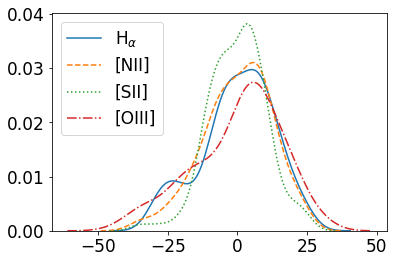

In [45]:
sns.kdeplot(histH, label=r'H$_{\alpha}$')
sns.kdeplot(histN, label='[NII]', linestyle='--')
sns.kdeplot(histS, label='[SII]', linestyle=':')
sns.kdeplot(histO, label='[OIII]',linestyle='-.')


In [66]:
GT='GetData02.csv'
dtx=pd.read_csv(GT)
#dt=dtx.rename(columns={'Unnamed: 0':'No'})
#dt=dt.drop('No',axis=1)
#os.remove(datap)
dtx.describe()

,pc,S,pc.1,S.1,pc.2,S.2,pc.3,S.3,pc.4,S.4,pc.5,S.5
count,44.000000,44.000000,38.000000,38.000000,38.000000,38.000000,32.000000,32.000000,41.000000,41.000000,41.000000,41.000000
mean,153.415977,74.576386,153.670632,60.099184,144.309474,119.791053,133.825312,125.812500,149.685366,55.964878,147.667073,46.026341
std,81.671930,27.484528,87.384921,22.810842,79.258877,29.788812,81.478815,26.555793,81.379725,26.579667,80.230553,7.661095
min,16.637000,7.443000,16.663000,16.002000,16.410000,43.960000,16.410000,53.090000,16.330000,8.880000,16.330000,26.240000
25%,88.233750,62.226000,77.806750,40.146500,77.920000,97.810000,67.682500,106.472500,82.800000,34.670000,82.800000,40.740000
50%,146.265000,77.712000,152.281000,61.844500,139.860000,124.405000,120.930000,132.930000,148.640000,56.670000,144.490000,43.910000
75%,215.948500,93.523000,228.126250,81.395500,209.782500,142.832500,191.285000,144.650000,214.770000,77.040000,208.770000,53.300000
max,294.119000,132.145000,293.667000,93.523000,277.360000,167.010000,296.880000,158.950000,293.230000,121.380000,296.010000,55.960000


In [67]:
dtx['pc.5']=dtx['pc.5'].replace(['0',0], np.nan)
dtx['pc.4']=dtx['pc.4'].replace(['0',0], np.nan)
dtx['pc.3']=dtx['pc.3'].replace(['0',0], np.nan)
dtx['pc.2']=dtx['pc.2'].replace(['0',0], np.nan)
dtx['pc.1']=dtx['pc.1'].replace(['0',0], np.nan)
dtx['pc']=dtx['pc'].replace(['0',0], np.nan)

[Text(0, 0.5, 'S$_{2}$(l) [-]'), Text(0.5, 0, 'lag [pc]')]

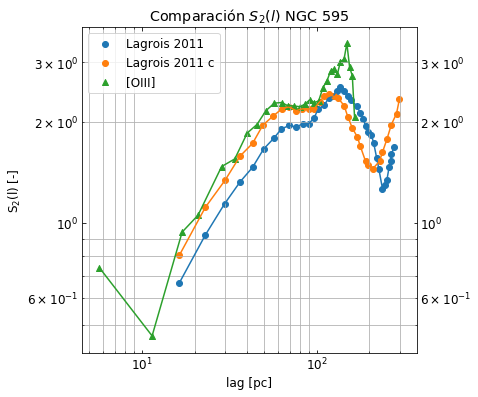

In [73]:
fig, ax=plt.subplots(figsize=(6,6))

plt.scatter(dtx['pc.2'],dtx['S.2']/65.93,label='Lagrois 2011')
plt.loglog(dtx['pc.2'],dtx['S.2']/65.93)
plt.scatter(dtx['pc.3'],dtx['S.3']/65.93,label='Lagrois 2011 c')
plt.loglog(dtx['pc.3'],dtx['S.3']/65.93)
plt.scatter(sfnO00['Lag']*4,sfnO00['Nmqvd'],label='[OIII]', marker='^')
plt.loglog(sfnO00['Lag']*4,sfnO00['Nmqvd'])
#plt.scatter(sfnH01['Lag']*4,sfnH01['Nmqvd'],label='ii', marker='^')
#plt.loglog(sfnH01['Lag']*4,sfnH01['Nmqvd'])
#plt.scatter(sfnH02['Lag']*4,sfnH02['Nmqvd'],label='iii', marker='^')
#plt.loglog(sfnH02['Lag']*4,sfnH02['Nmqvd'])

plt.grid(which='minor')
plt.title('Comparación $S_{2}(l)$ NGC 595')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [-]')

[Text(0, 0.5, 'S$_{2}$(l) [-]'), Text(0.5, 0, 'lag [pc]')]

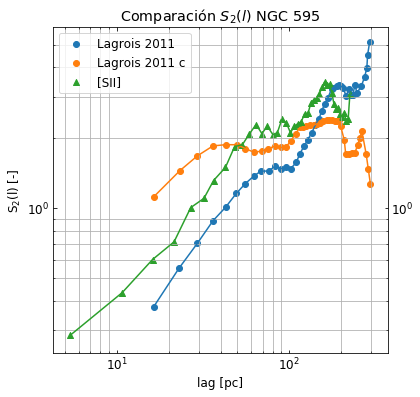

In [74]:
fig, ax=plt.subplots(figsize=(6,6))

plt.scatter(dtx['pc.4'],dtx['S.4']/23.52,label='Lagrois 2011')
plt.loglog(dtx['pc.4'],dtx['S.4']/23.52)
plt.scatter(dtx['pc.5'],dtx['S.5']/23.52,label='Lagrois 2011 c')
plt.loglog(dtx['pc.5'],dtx['S.5']/23.52)
plt.scatter(sfnS00['Lag']*4,sfnS00['Nmqvd'],label='[SII]', marker='^')
plt.loglog(sfnS00['Lag']*4,sfnS00['Nmqvd'])
#plt.scatter(sfnH01['Lag']*4,sfnH01['Nmqvd'],label='ii', marker='^')
#plt.loglog(sfnH01['Lag']*4,sfnH01['Nmqvd'])
#plt.scatter(sfnH02['Lag']*4,sfnH02['Nmqvd'],label='iii', marker='^')
#plt.loglog(sfnH02['Lag']*4,sfnH02['Nmqvd'])

plt.grid(which='minor')
plt.title('Comparación $S_{2}(l)$ NGC 595')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [-]')

In [46]:
sfnH00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,0.222009,0.038762,0.606721,0.368110,1.341000,246.0,0.008136,0.000000,inf,-inf,NaN,NaN
1,2.682000,0.334035,0.046155,0.770944,0.594355,2.682000,280.0,0.024188,0.589379,1.052929,0.142680,0.594996,0.214560
2,4.023000,0.420548,0.030016,0.901985,0.813576,4.023000,904.0,0.011470,0.582346,0.818911,0.367616,0.589624,0.106413
3,5.364000,0.623237,0.031376,1.062167,1.128199,5.364000,1147.0,0.010873,0.704387,0.918426,0.591237,0.738017,0.078332
4,6.705000,1.032796,0.040634,1.679820,2.821794,6.705000,1710.0,0.008970,0.883319,1.098383,0.830254,0.937319,0.066933
5,8.000000,1.076751,0.039925,1.641778,2.695435,8.000000,1692.0,0.007190,0.922379,1.011898,0.772820,0.902366,0.056940
6,9.099356,1.336982,0.042286,1.952966,3.814076,9.099356,2134.0,0.007805,0.966567,1.054150,0.836849,0.952522,0.051538
7,10.664807,1.647107,0.044789,2.204670,4.860568,10.664807,2424.0,0.007187,1.004806,1.071972,0.875590,0.984122,0.047052
8,12.039810,1.843351,0.048408,2.388239,5.703688,12.039810,2435.0,0.006846,1.026358,1.063616,0.878933,0.989636,0.046039
9,13.382451,2.114343,0.052166,2.629588,6.914735,13.382451,2542.0,0.007239,1.045049,1.073682,0.898869,1.005867,0.044200


In [47]:
sfnN00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,0.421221,0.077859,1.203674,1.448831,1.341000,240.0,0.008238,0.000000,inf,-inf,NaN,NaN
1,2.682000,0.543354,0.082112,1.351739,1.827199,2.682000,272.0,0.024695,0.367315,0.865202,-0.113748,0.372923,0.230752
2,4.023000,0.580535,0.039617,1.177227,1.385864,4.023000,884.0,0.011558,0.300107,0.538113,0.073274,0.303831,0.109574
3,5.364000,0.734470,0.039204,1.309674,1.715245,5.364000,1117.0,0.011026,0.369642,0.585997,0.239146,0.398262,0.082584
4,6.705000,0.934571,0.038735,1.586250,2.516189,6.705000,1678.0,0.009001,0.455540,0.647377,0.363475,0.488797,0.068280
5,8.000000,1.147764,0.046777,1.898366,3.603795,8.000000,1648.0,0.007271,0.531076,0.698048,0.442992,0.557372,0.061068
6,9.099356,1.258709,0.044046,2.010249,4.041101,9.099356,2084.0,0.007885,0.574580,0.696396,0.464518,0.578498,0.054677
7,10.664807,1.514359,0.048510,2.363591,5.586565,10.664807,2375.0,0.007255,0.620923,0.730874,0.519607,0.623802,0.049810
8,12.039810,1.742653,0.051360,2.509271,6.296441,12.039810,2388.0,0.006908,0.661556,0.753336,0.556078,0.656990,0.046532
9,13.382451,1.908440,0.055060,2.745853,7.539706,13.382451,2488.0,0.007316,0.691309,0.757956,0.570303,0.673189,0.044844


In [48]:
sfnS00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,0.285563,0.048158,0.663811,0.440645,1.341000,191.0,0.008901,0.000000,inf,-inf,NaN,NaN
1,2.682000,0.434326,0.063727,0.978998,0.958438,2.682000,237.0,0.025876,0.604972,1.068953,0.151219,0.608381,0.216317
2,4.023000,0.601832,0.055183,1.506199,2.268635,4.023000,746.0,0.012129,0.670671,0.926570,0.449207,0.682150,0.112613
3,5.364000,0.716326,0.056370,1.691103,2.859828,5.364000,901.0,0.012164,0.671874,0.851277,0.491865,0.671672,0.084714
4,6.705000,1.004459,0.061028,2.272001,5.161990,6.705000,1387.0,0.009544,0.748180,0.932885,0.645704,0.775590,0.068608
5,8.000000,1.100053,0.060533,2.196786,4.825867,8.000000,1318.0,0.007841,0.767216,0.888517,0.636167,0.763967,0.059494
6,9.099356,1.311600,0.069091,2.827658,7.995648,9.099356,1676.0,0.008714,0.796245,0.919461,0.686543,0.800750,0.054930
7,10.664807,1.493166,0.068659,2.995148,8.970909,10.664807,1904.0,0.008080,0.814080,0.908519,0.699905,0.807501,0.049244
8,12.039810,1.830020,0.081508,3.563127,12.695877,12.039810,1912.0,0.007685,0.844852,0.950378,0.754608,0.849946,0.046190
9,13.382451,1.869063,0.075519,3.382352,11.440308,13.382451,2007.0,0.008177,0.853444,0.914153,0.730982,0.832860,0.043984


In [49]:
sfnO00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.430400,0.737988,0.181571,1.683816,2.835235,1.430400,87.0,0.018084,0.000000,inf,-inf,NaN,NaN
1,2.860800,0.463497,0.075014,0.723407,0.523317,2.860800,94.0,0.035491,-0.671037,-0.047192,-1.243088,-0.653772,0.281964
2,4.248064,0.941648,0.061548,1.642307,2.697171,4.248064,713.0,0.018080,0.122483,0.541500,-0.040292,0.207897,0.141494
3,5.235876,1.056596,0.078026,1.581838,2.502213,5.235876,412.0,0.012247,0.309355,0.549127,0.047934,0.302139,0.118169
4,7.144651,1.473454,0.071606,2.218643,4.922377,7.144651,961.0,0.013932,0.482450,0.634975,0.262155,0.459860,0.088357
5,8.496127,1.552018,0.069147,2.139094,4.575724,8.496127,958.0,0.012107,0.538579,0.600218,0.268201,0.468999,0.083253
6,10.007552,1.852469,0.076793,2.576874,6.640280,10.007552,1127.0,0.011918,0.589725,0.639140,0.338258,0.522374,0.076062
7,11.365922,1.962227,0.082860,2.645026,6.996162,11.365922,1020.0,0.011185,0.613715,0.628021,0.344868,0.528868,0.075193
8,12.816246,2.159066,0.083880,2.843279,8.084237,12.816246,1150.0,0.011361,0.632390,0.635741,0.371182,0.546438,0.071552
9,14.289303,2.271711,0.079285,3.012840,9.077207,14.289303,1445.0,0.012005,0.641492,0.626131,0.377514,0.548379,0.069849


In [50]:
sfnO00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.430400,0.737988,0.181571,1.683816,2.835235,1.430400,87.0,0.018084,0.000000,inf,-inf,NaN,NaN
1,2.860800,0.463497,0.075014,0.723407,0.523317,2.860800,94.0,0.035491,-0.671037,-0.047192,-1.243088,-0.653772,0.281964
2,4.248064,0.941648,0.061548,1.642307,2.697171,4.248064,713.0,0.018080,0.122483,0.541500,-0.040292,0.207897,0.141494
3,5.235876,1.056596,0.078026,1.581838,2.502213,5.235876,412.0,0.012247,0.309355,0.549127,0.047934,0.302139,0.118169
4,7.144651,1.473454,0.071606,2.218643,4.922377,7.144651,961.0,0.013932,0.482450,0.634975,0.262155,0.459860,0.088357
5,8.496127,1.552018,0.069147,2.139094,4.575724,8.496127,958.0,0.012107,0.538579,0.600218,0.268201,0.468999,0.083253
6,10.007552,1.852469,0.076793,2.576874,6.640280,10.007552,1127.0,0.011918,0.589725,0.639140,0.338258,0.522374,0.076062
7,11.365922,1.962227,0.082860,2.645026,6.996162,11.365922,1020.0,0.011185,0.613715,0.628021,0.344868,0.528868,0.075193
8,12.816246,2.159066,0.083880,2.843279,8.084237,12.816246,1150.0,0.011361,0.632390,0.635741,0.371182,0.546438,0.071552
9,14.289303,2.271711,0.079285,3.012840,9.077207,14.289303,1445.0,0.012005,0.641492,0.626131,0.377514,0.548379,0.069849


In [51]:
sfwH00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,1.992691,0.572690,8.964021,80.353673,1.341000,246.0,0.008136,0.000000,inf,-inf,NaN,NaN
1,2.682000,4.935158,0.879931,14.697746,216.023749,2.682000,280.0,0.024188,1.308378,2.033910,0.660609,1.334299,0.323863
2,4.023000,2.073672,0.251739,7.564758,57.225560,4.023000,904.0,0.011470,0.173244,0.448966,-0.311492,0.103573,0.181484
3,5.364000,2.437258,0.204156,6.911212,47.764854,5.364000,1147.0,0.010873,0.036305,0.447709,-0.100062,0.127984,0.134426
4,6.705000,3.160756,0.192085,7.940819,63.056613,6.705000,1710.0,0.008970,0.094703,0.533820,0.090719,0.239748,0.120058
5,8.000000,3.107704,0.184670,7.593938,57.667894,8.000000,1692.0,0.007190,0.108605,0.470851,0.073076,0.217510,0.103764
6,9.099356,3.524166,0.198536,9.169271,84.075537,9.099356,2134.0,0.007805,0.143902,0.503342,0.135551,0.260932,0.098983
7,10.664807,4.190954,0.190940,9.398845,88.338282,10.664807,2424.0,0.007187,0.197938,0.543432,0.214219,0.318530,0.091896
8,12.039810,4.402347,0.245652,12.119399,146.879833,12.039810,2435.0,0.006846,0.235677,0.540267,0.219889,0.331944,0.085129
9,13.382451,6.679627,0.361146,18.204743,331.412656,13.382451,2542.0,0.007239,0.325091,0.695953,0.391811,0.470952,0.093193


In [52]:
sfwN00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,0.304493,0.091928,1.421165,2.019711,1.341000,240.0,0.008238,0.000000,inf,-inf,NaN,NaN
1,2.682000,0.808396,0.213414,3.513233,12.342803,2.682000,272.0,0.024695,1.408652,2.265145,0.585815,1.419871,0.395849
2,4.023000,0.268729,0.041101,1.221323,1.491630,4.023000,884.0,0.011558,0.050204,0.342953,-0.504966,-0.037270,0.203022
3,5.364000,0.288848,0.029961,1.000879,1.001758,5.364000,1117.0,0.011026,-0.155122,0.292391,-0.307353,-0.056694,0.146961
4,6.705000,0.376303,0.030905,1.265596,1.601733,6.705000,1678.0,0.009001,-0.099238,0.403912,-0.085608,0.073022,0.135123
5,8.000000,0.344351,0.026976,1.094756,1.198490,8.000000,1648.0,0.007271,-0.098246,0.312331,-0.124516,0.029856,0.115486
6,9.099356,0.421637,0.029642,1.352842,1.830183,9.099356,2084.0,0.007885,-0.043077,0.393168,-0.005863,0.114743,0.114005
7,10.664807,0.460024,0.024660,1.201531,1.443676,10.664807,2375.0,0.007255,0.010207,0.397508,0.045191,0.150969,0.100986
8,12.039810,0.491073,0.032277,1.576949,2.486767,12.039810,2388.0,0.006908,0.054874,0.410514,0.066580,0.177323,0.095240
9,13.382451,0.725663,0.047293,2.358518,5.562608,13.382451,2488.0,0.007316,0.147556,0.561163,0.233518,0.314079,0.102886


In [53]:
sfwS00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,0.108942,0.030380,0.418764,0.175363,1.341000,191.0,0.008901,0.000000,inf,-inf,NaN,NaN
1,2.682000,0.247215,0.052535,0.807065,0.651354,2.682000,237.0,0.025876,1.182198,1.931855,0.482668,1.198907,0.341645
2,4.023000,0.111057,0.012087,0.329899,0.108833,4.023000,746.0,0.012129,0.142913,0.409115,-0.311280,0.080249,0.171715
3,5.364000,0.127185,0.010000,0.300002,0.090001,5.364000,901.0,0.012164,0.013285,0.402111,-0.124820,0.096859,0.128800
4,6.705000,0.174010,0.011863,0.441632,0.195039,6.705000,1387.0,0.009544,0.097667,0.535075,0.094263,0.242335,0.119513
5,8.000000,0.160023,0.010164,0.368851,0.136051,8.000000,1318.0,0.007841,0.101210,0.432810,0.040819,0.191613,0.099492
6,9.099356,0.203566,0.013151,0.538234,0.289696,9.099356,1676.0,0.008714,0.160822,0.529931,0.163159,0.284637,0.100142
7,10.664807,0.226646,0.010849,0.473284,0.223998,10.664807,1904.0,0.008080,0.214053,0.533515,0.211015,0.319527,0.087363
8,12.039810,0.249512,0.014630,0.639534,0.409003,12.039810,1912.0,0.007685,0.259844,0.552486,0.237968,0.350099,0.082785
9,13.382451,0.331659,0.018632,0.834491,0.696375,13.382451,2007.0,0.008177,0.332099,0.649796,0.351874,0.444590,0.083905


In [54]:
sfwO00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.430400,0.108434,0.026502,0.245766,0.060401,1.430400,87.0,0.018084,0.000000,inf,-inf,NaN,NaN
1,2.860800,0.155350,0.030963,0.298600,0.089162,2.860800,94.0,0.035491,0.518702,1.185222,-0.117443,0.528827,0.307069
2,4.248064,0.123990,0.007997,0.213390,0.045535,4.248064,713.0,0.018080,0.167979,0.438040,-0.138967,0.155684,0.136094
3,5.235876,0.155586,0.012103,0.245359,0.060201,5.235876,412.0,0.012247,0.210216,0.551960,0.047333,0.269836,0.121406
4,7.144651,0.216725,0.016077,0.498117,0.248121,7.144651,961.0,0.013932,0.341910,0.649269,0.246675,0.412618,0.099186
5,8.496127,0.232338,0.014886,0.460503,0.212063,8.496127,958.0,0.012107,0.395947,0.619871,0.267829,0.427882,0.083995
6,10.007552,0.344803,0.026067,0.874694,0.765090,10.007552,1127.0,0.011918,0.510563,0.776172,0.441848,0.576194,0.083232
7,11.365922,0.289530,0.021073,0.672688,0.452509,11.365922,1020.0,0.011185,0.519965,0.642949,0.331887,0.498267,0.073851
8,12.816246,0.446487,0.042531,1.441683,2.078449,12.816246,1150.0,0.011361,0.595948,0.814729,0.500058,0.636912,0.076031
9,14.289303,0.435578,0.031333,1.190640,1.417624,14.289303,1445.0,0.012005,0.630241,0.756115,0.476731,0.621029,0.065959


In [55]:
sfw2H00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,0.323850,0.082912,1.300430,1.691119,1.341000,247.0,0.008106,0.000000,inf,-inf,NaN,NaN
1,2.682000,0.976696,0.146565,2.456876,6.036241,2.682000,282.0,0.024150,1.592583,2.220961,1.029152,1.614232,0.281051
2,4.023000,0.936837,0.106022,3.187718,10.161546,4.023000,905.0,0.011483,1.034259,1.333667,0.650073,1.006000,0.161537
3,5.364000,1.169147,0.104658,3.542931,12.552362,5.364000,1147.0,0.010873,0.895422,1.201206,0.693951,0.930193,0.120401
4,6.705000,1.517465,0.104794,4.338513,18.822695,6.705000,1715.0,0.008948,0.876191,1.184908,0.773567,0.944889,0.100929
5,8.000000,1.456064,0.098621,4.056683,16.456679,8.000000,1693.0,0.007186,0.806244,1.043932,0.674754,0.841644,0.088208
6,9.099356,1.757507,0.099981,4.620788,21.351680,9.099356,2137.0,0.007795,0.793018,1.066667,0.733686,0.864457,0.083728
7,10.664807,1.819451,0.093711,4.613797,21.287126,10.664807,2425.0,0.007184,0.765069,0.999248,0.696966,0.820427,0.074747
8,12.039810,1.722154,0.088058,4.346156,18.889073,12.039810,2437.0,0.006842,0.719953,0.918835,0.633595,0.757461,0.068953
9,13.382451,2.150753,0.099471,5.017150,25.171791,13.382451,2545.0,0.007235,0.715002,0.971189,0.703313,0.796501,0.071369


In [56]:
sfw2N00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,0.397180,0.137178,2.120714,4.497428,1.341000,240.0,0.008238,0.000000,inf,-inf,NaN,NaN
1,2.682000,0.866885,0.207678,3.437681,11.817650,2.682000,275.0,0.024458,1.126046,2.047151,0.302925,1.158707,0.411334
2,4.023000,0.862848,0.120111,3.573169,12.767537,4.023000,886.0,0.011532,0.751417,1.210505,0.299721,0.753881,0.214676
3,5.364000,1.363492,0.150139,5.017879,25.179114,5.364000,1118.0,0.011019,0.817858,1.270708,0.591561,0.893375,0.163018
4,6.705000,1.551606,0.126559,5.187384,26.908950,6.705000,1681.0,0.008999,0.817341,1.158643,0.609464,0.861816,0.130710
5,8.000000,1.498627,0.125755,5.105079,26.061830,8.000000,1649.0,0.007267,0.760604,1.025848,0.528321,0.771591,0.117354
6,9.099356,1.956467,0.130116,5.944192,35.333424,9.099356,2088.0,0.007878,0.775351,1.087635,0.641851,0.834946,0.107852
7,10.664807,1.893871,0.117973,5.751733,33.082436,10.664807,2378.0,0.007253,0.749687,0.986777,0.579202,0.771889,0.096493
8,12.039810,1.874257,0.111544,5.450840,29.711659,12.039810,2389.0,0.006907,0.714784,0.926318,0.543804,0.728302,0.090328
9,13.382451,2.176051,0.118927,5.933276,35.203768,13.382451,2490.0,0.007314,0.704434,0.946646,0.585951,0.745677,0.086668


In [57]:
sfw2S00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,0.429279,0.125945,1.749688,3.061408,1.341000,194.0,0.008775,0.000000,inf,-inf,NaN,NaN
1,2.682000,1.076175,0.194211,2.983521,8.901399,2.682000,237.0,0.025876,1.325924,2.066287,0.667648,1.353286,0.329851
2,4.023000,0.850576,0.104312,2.854788,8.149812,4.023000,750.0,0.012143,0.698181,1.043825,0.269165,0.670390,0.182941
3,5.364000,1.490065,0.143941,4.325426,18.709308,5.364000,904.0,0.012142,0.785122,1.214717,0.638834,0.879557,0.141106
4,6.705000,1.651437,0.119083,4.434946,19.668742,6.705000,1388.0,0.009550,0.783364,1.096155,0.630771,0.836763,0.111837
5,8.000000,1.622401,0.121136,4.397757,19.340268,8.000000,1319.0,0.007839,0.733366,0.979177,0.556929,0.756491,0.099972
6,9.099356,2.077289,0.124920,5.115605,26.169414,9.099356,1678.0,0.008712,0.747406,1.035301,0.656692,0.813133,0.093186
7,10.664807,1.933869,0.110739,4.834631,23.373659,10.664807,1907.0,0.008077,0.713686,0.920229,0.573387,0.735767,0.082247
8,12.039810,1.977024,0.107278,4.692095,22.015755,12.039810,1914.0,0.007682,0.680872,0.878145,0.553209,0.704075,0.077172
9,13.382451,2.081889,0.105909,4.743514,22.500926,13.382451,2007.0,0.008177,0.656281,0.858853,0.551807,0.688980,0.073592


In [58]:
sfw2O00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.430400,0.841471,0.343466,3.185168,10.145295,1.430400,87.0,0.018084,0.000000,inf,-inf,NaN,NaN
1,2.860800,2.772780,0.518992,5.004976,25.049781,2.860800,94.0,0.035491,1.720348,2.724631,0.927543,1.790841,0.424554
2,4.248064,1.705144,0.160635,4.298289,18.475288,4.248064,717.0,0.018036,0.770241,1.213424,0.243468,0.742378,0.228904
3,5.235876,1.975002,0.209230,4.246905,18.036202,5.235876,413.0,0.012221,0.596720,1.139358,0.307417,0.681165,0.199098
4,7.144651,2.022941,0.147796,4.584071,21.013703,7.144651,963.0,0.013915,0.461245,0.915321,0.285373,0.553979,0.153231
5,8.496127,2.104752,0.138976,4.301537,18.503225,8.496127,959.0,0.012110,0.395890,0.844879,0.284116,0.508295,0.139912
6,10.007552,2.462317,0.155060,5.205489,27.097113,10.007552,1128.0,0.011910,0.388607,0.852950,0.342539,0.528032,0.133091
7,11.365922,1.895967,0.125424,4.007694,16.061614,11.365922,1022.0,0.011183,0.315862,0.675908,0.193759,0.395176,0.118166
8,12.816246,2.419168,0.150790,5.113534,26.148230,12.816246,1151.0,0.011359,0.310838,0.748388,0.296146,0.451790,0.121135
9,14.289303,2.207292,0.127664,4.854576,23.566912,14.289303,1447.0,0.011996,0.286809,0.671344,0.244400,0.400851,0.110880


In [59]:
afH00

,Lag,Nmqvd,ErrY,ErrX,StD,Var,Lag pc,# P
0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,1.341000,0.927927,0.083862,0.008089,1.317997,1.737116,1.341000,247
2,2.682000,1.003827,0.075177,0.024107,1.262431,1.593732,2.682000,282
3,4.023000,0.693242,0.037625,0.011476,1.131879,1.281150,4.023000,905
4,5.364000,0.712012,0.035354,0.010869,1.197343,1.433631,5.364000,1147
5,6.705000,0.410091,0.024789,0.008946,1.026560,1.053825,6.705000,1715
6,8.000000,0.422022,0.026846,0.007184,1.104615,1.220175,8.000000,1693
7,9.099356,0.326114,0.023938,0.007793,1.106613,1.224593,9.099356,2137
8,10.664807,0.137204,0.019633,0.007183,0.966806,0.934714,10.664807,2425
9,12.039810,0.047522,0.019506,0.006841,0.962928,0.927231,12.039810,2437


In [60]:
afN00

,Lag,Nmqvd,ErrY,ErrX,StD,Var,Lag pc,# P
0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,1.341000,0.821919,0.087322,0.008220,1.352791,1.830043,1.341000,240
2,2.682000,0.841085,0.070347,0.024413,1.166578,1.360905,2.682000,275
3,4.023000,0.541466,0.032029,0.011525,0.953365,0.908904,4.023000,886
4,5.364000,0.588302,0.032332,0.011014,1.081060,1.168691,5.364000,1118
5,6.705000,0.367338,0.022447,0.008996,0.920316,0.846982,6.705000,1681
6,8.000000,0.337288,0.026035,0.007265,1.057238,1.117752,8.000000,1649
7,9.099356,0.297881,0.023174,0.007876,1.058907,1.121285,9.099356,2088
8,10.664807,0.126043,0.020460,0.007252,0.997730,0.995464,10.664807,2378
9,12.039810,0.026062,0.018973,0.006905,0.927350,0.859978,12.039810,2389


In [61]:
afS00

,Lag,Nmqvd,ErrY,ErrX,StD,Var,Lag pc,# P
0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,1.341000,0.680871,0.090256,0.008752,1.257119,1.580349,1.341000,194
2,2.682000,0.952882,0.098024,0.025822,1.509065,2.277277,2.682000,237
3,4.023000,0.507242,0.038897,0.012135,1.065232,1.134720,4.023000,750
4,5.364000,0.536420,0.034000,0.012135,1.022277,1.045050,5.364000,904
5,6.705000,0.317573,0.025968,0.009546,0.967478,0.936013,6.705000,1388
6,8.000000,0.323199,0.024616,0.007836,0.893997,0.799231,8.000000,1319
7,9.099356,0.221919,0.022501,0.008709,0.921721,0.849570,9.099356,1678
8,10.664807,0.119253,0.020574,0.008075,0.898429,0.807175,10.664807,1907
9,12.039810,0.014609,0.023177,0.007680,1.013980,1.028156,12.039810,1914


In [62]:
afO00

,Lag,Nmqvd,ErrY,ErrX,StD,Var,Lag pc,# P
0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,2.860800,0.515972,0.047786,0.032041,1.005774,1.011581,2.860800,443
2,5.721600,0.379329,0.025959,0.022033,0.986802,0.973777,5.721600,1445
3,8.582400,0.166289,0.021435,0.018103,1.007220,1.014492,8.582400,2208
4,11.443200,-0.018241,0.019044,0.016187,0.933725,0.871842,11.443200,2404
5,14.304000,-0.144796,0.017093,0.016712,0.907220,0.823047,14.304000,2817
6,17.164800,-0.142475,0.018732,0.016369,0.919771,0.845979,17.164800,2411
7,20.025600,-0.089876,0.019395,0.018238,0.925914,0.857317,20.025600,2279
8,22.886400,-0.044723,0.022799,0.019637,0.976900,0.954334,22.886400,1836
9,25.747200,0.052786,0.029045,0.023387,1.053242,1.109320,25.747200,1315


In [63]:
dataS

,X,Y,RV,I
0,128.736,22.0,-193.095896,41.30
1,127.395,22.0,-183.386380,10.42
2,126.054,22.0,-159.157127,16.85
3,124.713,22.0,-195.501006,22.71
10,115.326,22.0,-196.480865,11.05
...,...,...,...,...
363,81.801,0.0,-172.385230,58.54
364,80.460,0.0,-168.955722,145.90
366,77.778,0.0,-166.728769,52.22
367,76.437,0.0,-171.806222,23.77


In [64]:
df = pd.DataFrame({'H': dataH.RV, 'N': dataN.RV, 'S':dataS.RV, 'O':dataO.RV})

/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


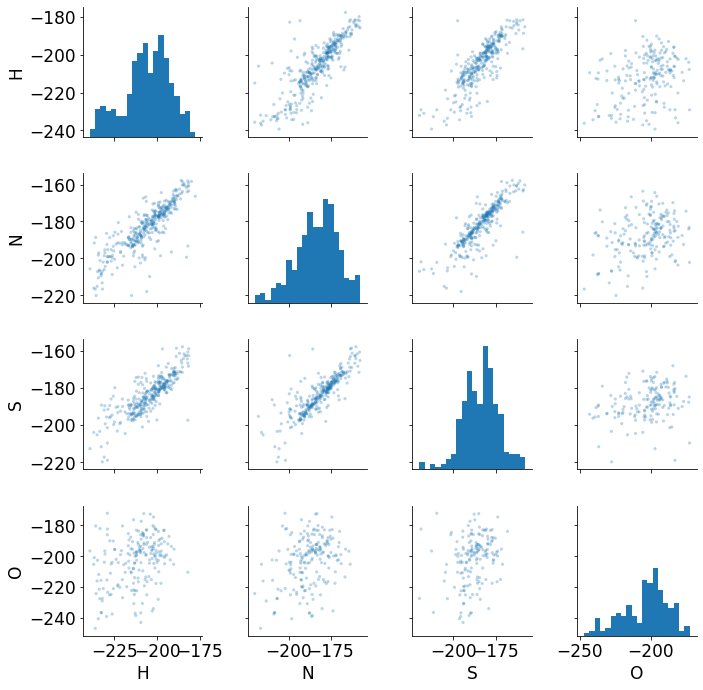

In [65]:
sns.pairplot(df, 
             vars=["H", "N", "S", "O"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="12"